In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv("sales_data_sample.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [10]:
dc=['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY']
df=df.drop(dc,axis=1)

In [12]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
dft = pd.DataFrame(df)
df.sort_values(by = ['ORDERDATE'], inplace = True)
df.set_index('ORDERDATE', inplace = True)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Euro Shopping Channel'),
  Text(1, 0, 'Mini Gifts Distributors Ltd.'),
  Text(2, 0, 'Australian Collectors, Co.'),
  Text(3, 0, 'Muscle Machine Inc'),
  Text(4, 0, 'La Rochelle Gifts'),
  Text(5, 0, 'Dragon Souveniers, Ltd.'),
  Text(6, 0, 'Land of Toys Inc.'),
  Text(7, 0, 'The Sharp Gifts Warehouse'),
  Text(8, 0, 'AV Stores, Co.'),
  Text(9, 0, "Anna's Decorations, Ltd"),
  Text(10, 0, 'Souveniers And Things Co.'),
  Text(11, 0, 'Corporate Gift Ideas Co.'),
  Text(12, 0, 'Salzburg Collectables'),
  Text(13, 0, 'Danish Wholesale Imports'),
  Text(14, 0, 'Saveley & Henriot, Co.'),
  Text(15, 0, "L'ordine Souveniers"),
  Text(16, 0, 'Rovelli Gifts'),
  Text(17, 0, 'Reims Collectables'),
  Text(18, 0, 'Scandinavian Gift Ideas'),
  Text(19, 0, 'Online Diecast Creations Co.')])

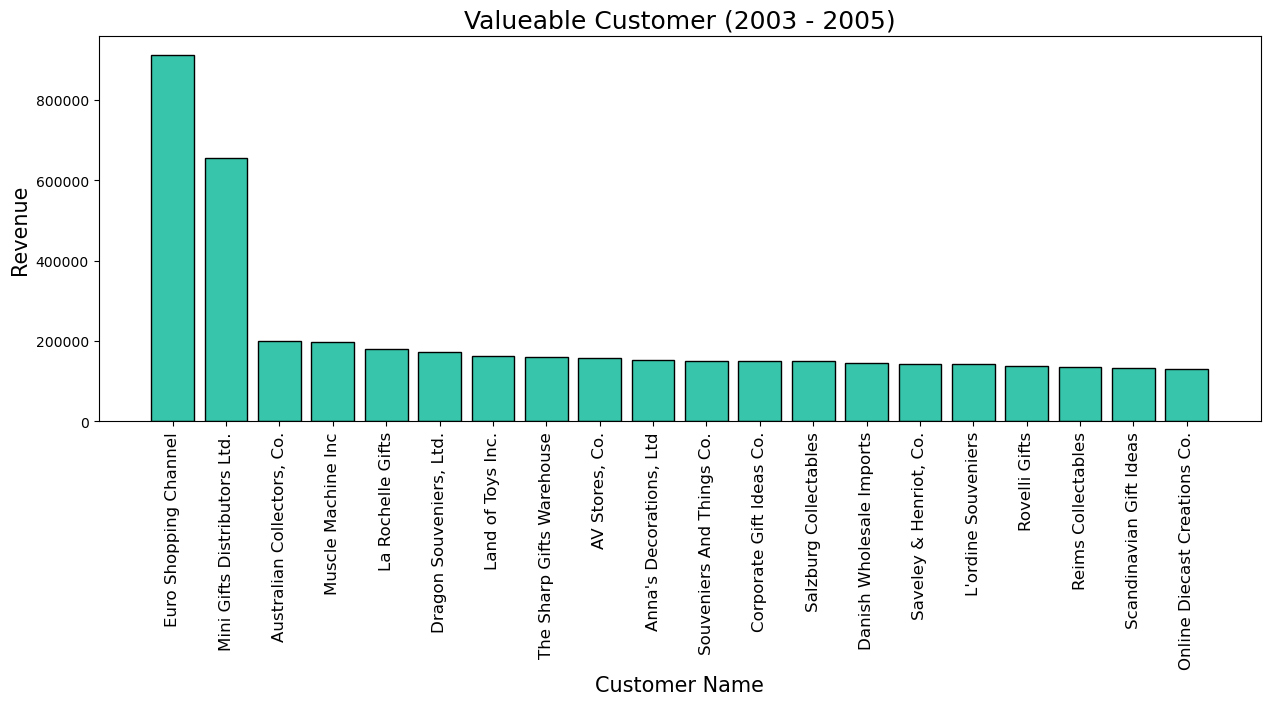

In [14]:
top_customer = df.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(20)
top_customer = top_customer[['SALES']].round(3)
top_customer.reset_index(inplace = True)
plt.figure(figsize = (15,5))
plt.title('Valueable Customer (2003 - 2005)', fontsize = 18)
plt.bar(top_customer['CUSTOMERNAME'], top_customer['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xlabel('Customer Name', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'UK'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Finland'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'Denmark'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'Germany'),
  Text(12, 0, 'Sweden'),
  Text(13, 0, 'Austria'),
  Text(14, 0, 'Japan'),
  Text(15, 0, 'Switzerland'),
  Text(16, 0, 'Belgium'),
  Text(17, 0, 'Philippines'),
  Text(18, 0, 'Ireland')])

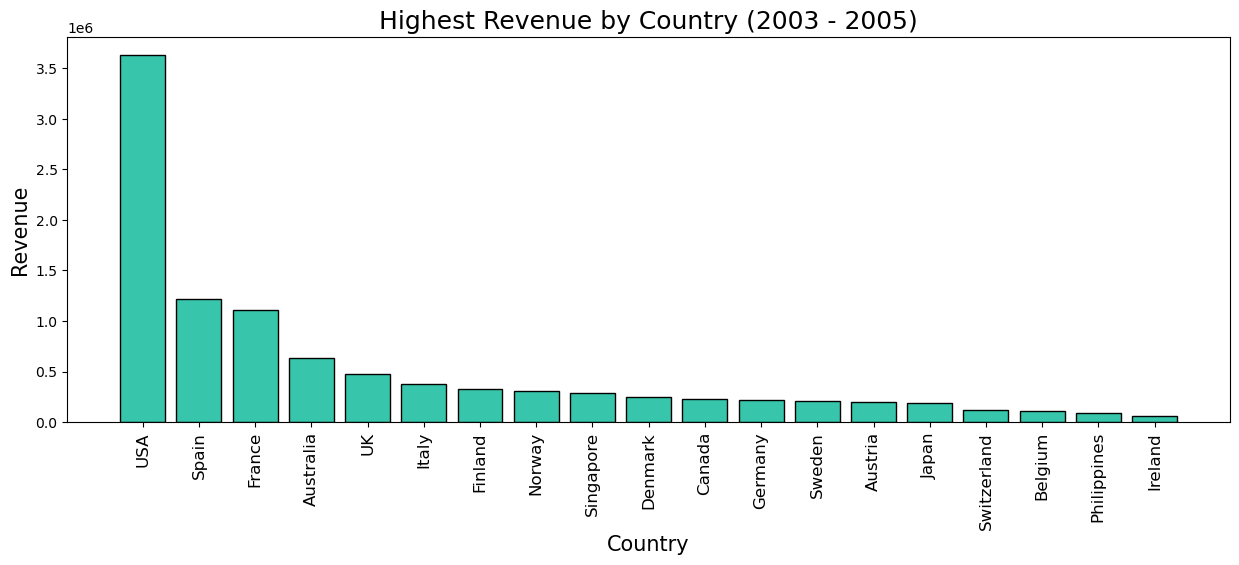

In [15]:
top_country = df.groupby(['COUNTRY']).sum().sort_values('SALES', ascending = False).head(20)
top_country = top_country[['SALES']].round(3)
top_country.reset_index(inplace = True)
plt.figure(figsize = (15,5))
plt.title('Highest Revenue by Country (2003 - 2005)', fontsize = 18)
plt.bar(top_country['COUNTRY'], top_country['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)

([<matplotlib.patches.Wedge at 0x13806f4a450>,
 [Text(0.38721306866664007, 1.0828508851424394, 'Classic Cars'),
  Text(-1.1452535064869658, 0.10437627067159248, 'Vintage Cars'),
  Text(-0.7412860144666744, -0.8792013675808936, 'Motorcycles'),
  Text(0.020581460991117233, -1.1498158128428533, 'Trucks and Buses'),
  Text(0.7198535531015819, -0.8968337984749617, 'Planes'),
  Text(1.0740749165646197, -0.4109295238927291, 'Ships'),
  Text(1.1471152573384091, -0.0814038474608887, 'Trains')])

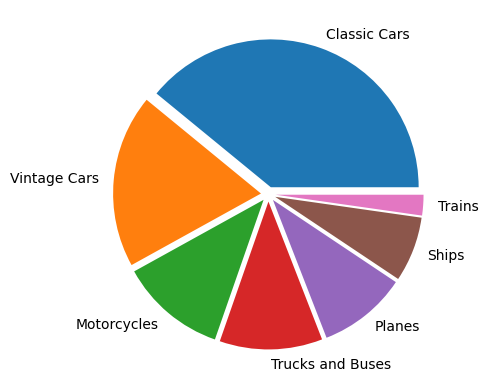

In [17]:
top_product = df.groupby(['PRODUCTLINE']).sum().sort_values('SALES', ascending = False)
top_product = top_product[['SALES']]
top_product.reset_index(inplace = True)
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(top_product['SALES'],labels = top_product['PRODUCTLINE'],explode = explode)

In [20]:
import seaborn as sns
import time
import matplotlib.ticker as ticker
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
print('Order Date Description\n')
print(dft['ORDERDATE'].describe())

Order Date Description

count                             2823
mean     2004-05-11 00:16:49.989373056
min                2003-01-06 00:00:00
25%                2003-11-06 12:00:00
50%                2004-06-15 00:00:00
75%                2004-11-17 12:00:00
max                2005-05-31 00:00:00
Name: ORDERDATE, dtype: object


In [21]:
dft.sort_values(by = ['ORDERDATE'], inplace = True, ascending = True)
dft.set_index('ORDERDATE', inplace = True)
new_data = pd.DataFrame(dft['SALES'])
new_data.head()

,SALES
ORDERDATE,
2003-01-06,5151.00
2003-01-06,3390.00
2003-01-06,1903.22
2003-01-06,1689.03
2003-01-09,1404.00


<Axes: xlabel='ORDERDATE'>

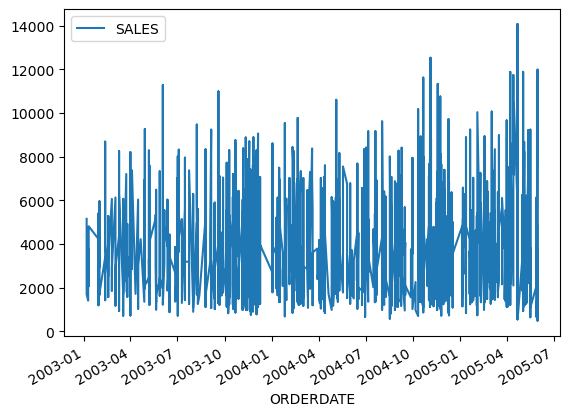

In [22]:
new_data.plot()

In [26]:
new_data = pd.DataFrame(new_data['SALES'].resample('D').mean())
new_data = new_data.interpolate(method = 'linear')
new_data.head()

,SALES
ORDERDATE,
2003-01-06,3033.312500
2003-01-07,2974.903333
2003-01-08,2916.494167
2003-01-09,2858.085000
2003-01-10,3432.025000


In [28]:
train, test, validation = np.split(new_data['SALES'].sample(frac = 1),[int(.6*len(new_data['SALES'])), int(.8*len(new_data['SALES']))])
print('Train Dataset')
print(train)
print('Test Dataset')
print(test)
print('Validation Dataset')
print(validation)

Train Dataset
ORDERDATE
2003-02-17    3121.184444
2004-08-03    3439.131429
2003-02-04    3611.470172
2003-02-07    3745.728956
2004-12-01    4170.652000
                 ...     
2004-05-03    3916.019556
2003-05-28    3592.541765
2003-02-03    3566.717245
2005-01-08    4296.751111
2003-01-29    3418.875000
Name: SALES, Length: 526, dtype: float64
Test Dataset
ORDERDATE
2004-12-31    3204.792030
2005-05-24    3762.493706
2005-03-23    4024.348750
2003-08-25    3486.007500
2003-04-26    3176.360204
                 ...     
2003-01-25    3421.643421
2003-11-15    3673.345877
2003-05-04    3631.436500
2005-02-01    3253.641716
2004-01-09    2986.165000
Name: SALES, Length: 175, dtype: float64
Validation Dataset
ORDERDATE
2003-01-07    2974.903333
2004-08-21    2626.574615
2004-11-11    2994.080625
2004-11-10    3009.826250
2004-10-20    3709.778559
                 ...     
2004-05-19    4469.381181
2003-02-18    3135.725238
2003-10-11    4026.523333
2004-09-26    2659.107273
2005-04-10

In [30]:
from statsmodels.tsa.stattools import adfuller
#statsmodel provied addfuller()
data1 = new_data.iloc[:,0].values
adf = adfuller(data1) 

print(adf)
print('\nADF = ', str(adf[0]))
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')

for key, val in adf[4].items():
    print(key,':',val)
    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

(-9.903887304631137, 3.302498206951594e-17, 2, 874, {'1%': -3.437854130362047, '5%': -2.8648525821630173, '10%': -2.5685338603647714}, 12630.895135819677)

ADF =  -9.903887304631137

p-value =  3.302498206951594e-17

Critical Values: 
1% : -3.437854130362047
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.8648525821630173
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.5685338603647714
Null Hypothesis Rejected. Time Series is Stationary


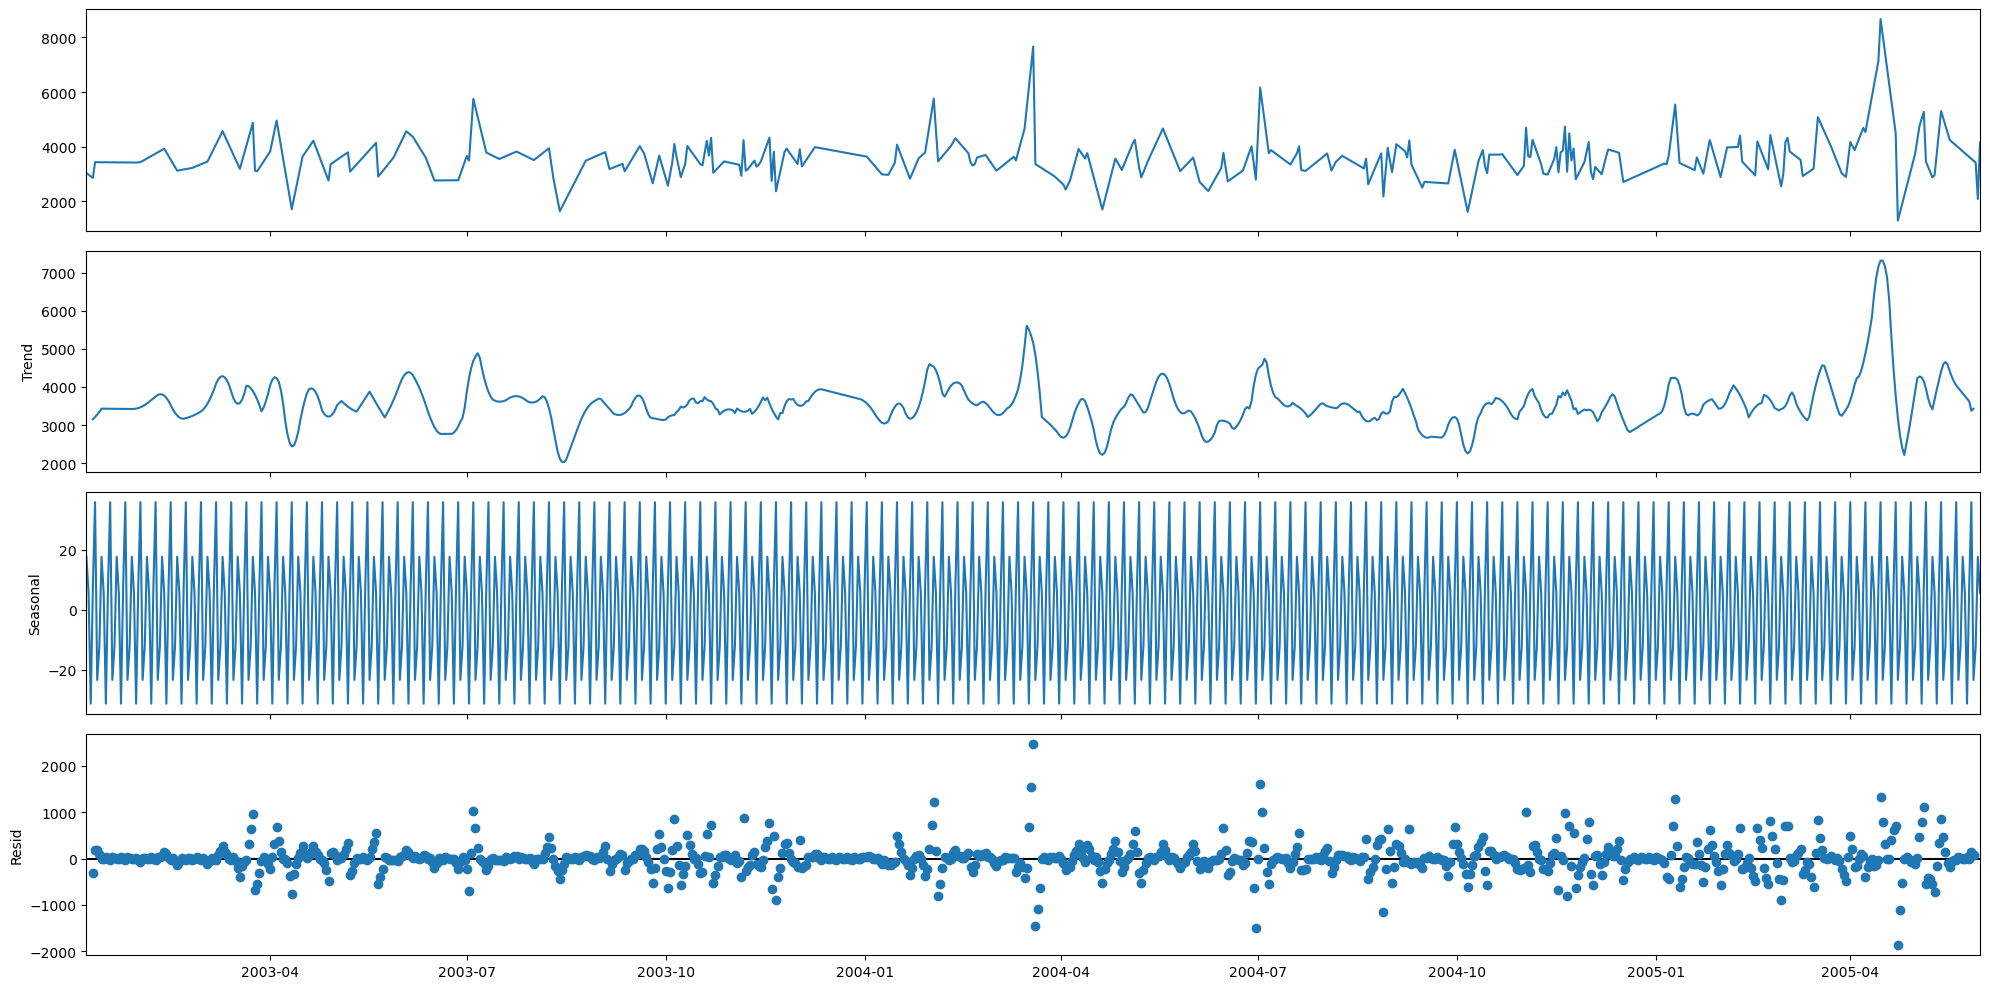

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(new_data, model = 'additive')

fig = decomposition.plot()
plt.show()

In [48]:
import itertools
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [50]:
for parameters in pdq:
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_data,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16204.635766743788
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:16204.635766743788
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:16204.635766743788
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:16204.635766743788
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:16204.635766743788
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:16204.635766743788
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:16204.635766743788
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:16204.635766743788
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:12996.296216193296
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1

In [51]:
mod = sm.tsa.statespace.SARIMAX(new_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8428      0.011     74.612      0.000       0.821       0.865
ma.L1         -1.0056      0.006   -170.635      0.000      -1.017      -0.994
ar.S.L12      -0.0505      0.040     -1.254      0.210      -0.129       0.028
ma.S.L12      -0.9721      0.020    -48.344      0.000      -1.011      -0.933
sigma2      1.561e+05   3341.854     46.714      0.000     1.5e+05    1.63e+05


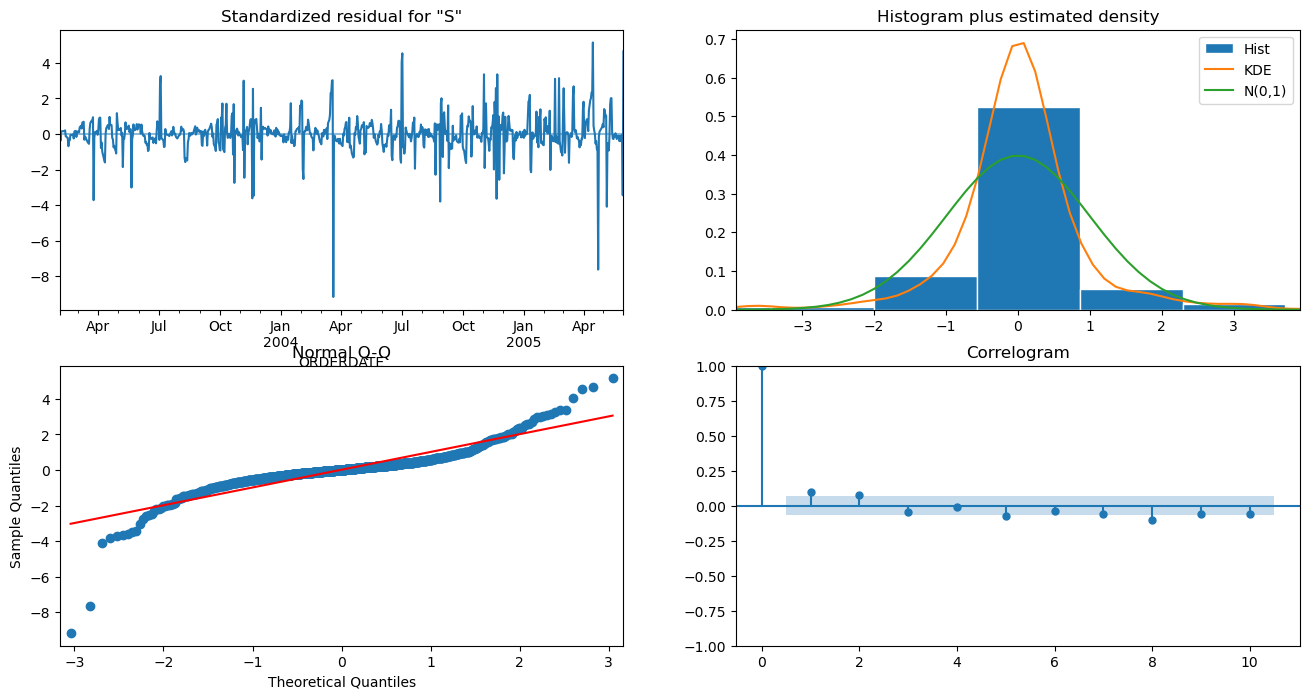

In [56]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

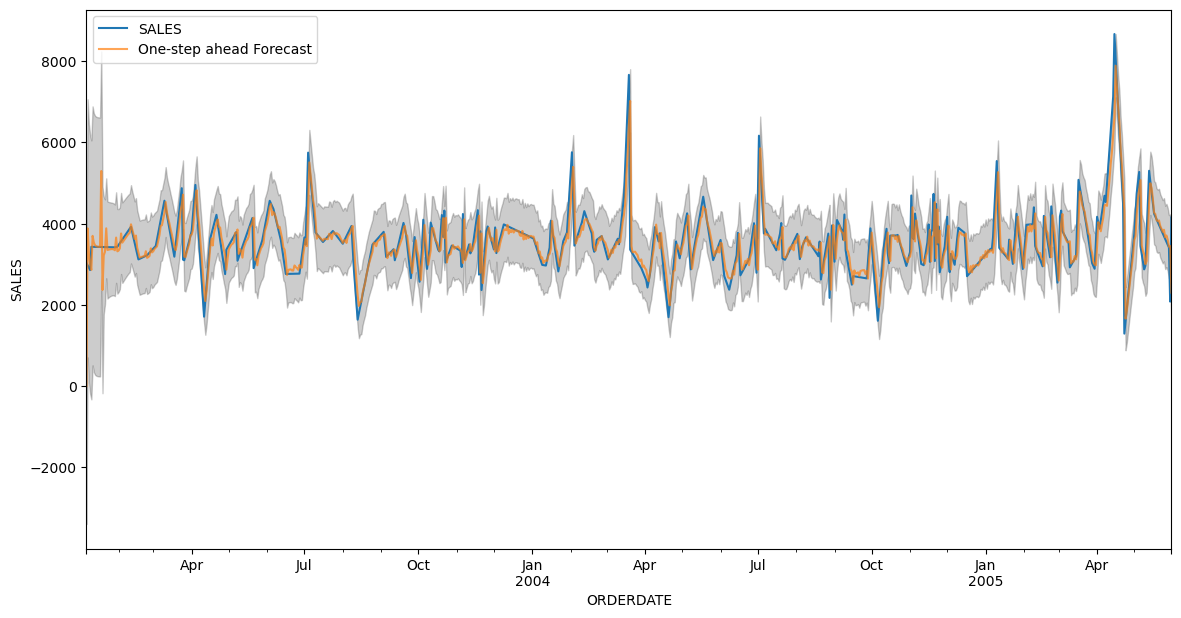

In [60]:
pred = results.get_prediction(start=pd.to_datetime('2003-01-06'), dynamic=False)
pred_val = pred.conf_int()
ax = new_data['2002':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('ORDERDATE')
ax.set_ylabel('SALES')
plt.legend()
plt.show()

In [62]:
y_forecasted = pred.predicted_mean
y_truth = new_data['SALES']

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('The Mean Squared Error of the forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of the forecasts is 416.64


In [64]:
forecast = results.forecast(steps=7)
print(forecast.astype('float'))

2005-06-01    4082.998638
2005-06-02    4099.451894
2005-06-03    4052.000608
2005-06-04    4038.020935
2005-06-05    4015.923626
2005-06-06    4110.607295
2005-06-07    4018.809269
Freq: D, Name: predicted_mean, dtype: float64


In [66]:
forecast = forecast.astype('float')
forecast_df = forecast.to_frame()
forecast_df.reset_index(level=0, inplace=True)
forecast_df.columns = ['Prediction Date', 'Predicted Sales']
prediction = pd.DataFrame(forecast_df).to_csv('prediction.csv',index=False)

<Axes: >

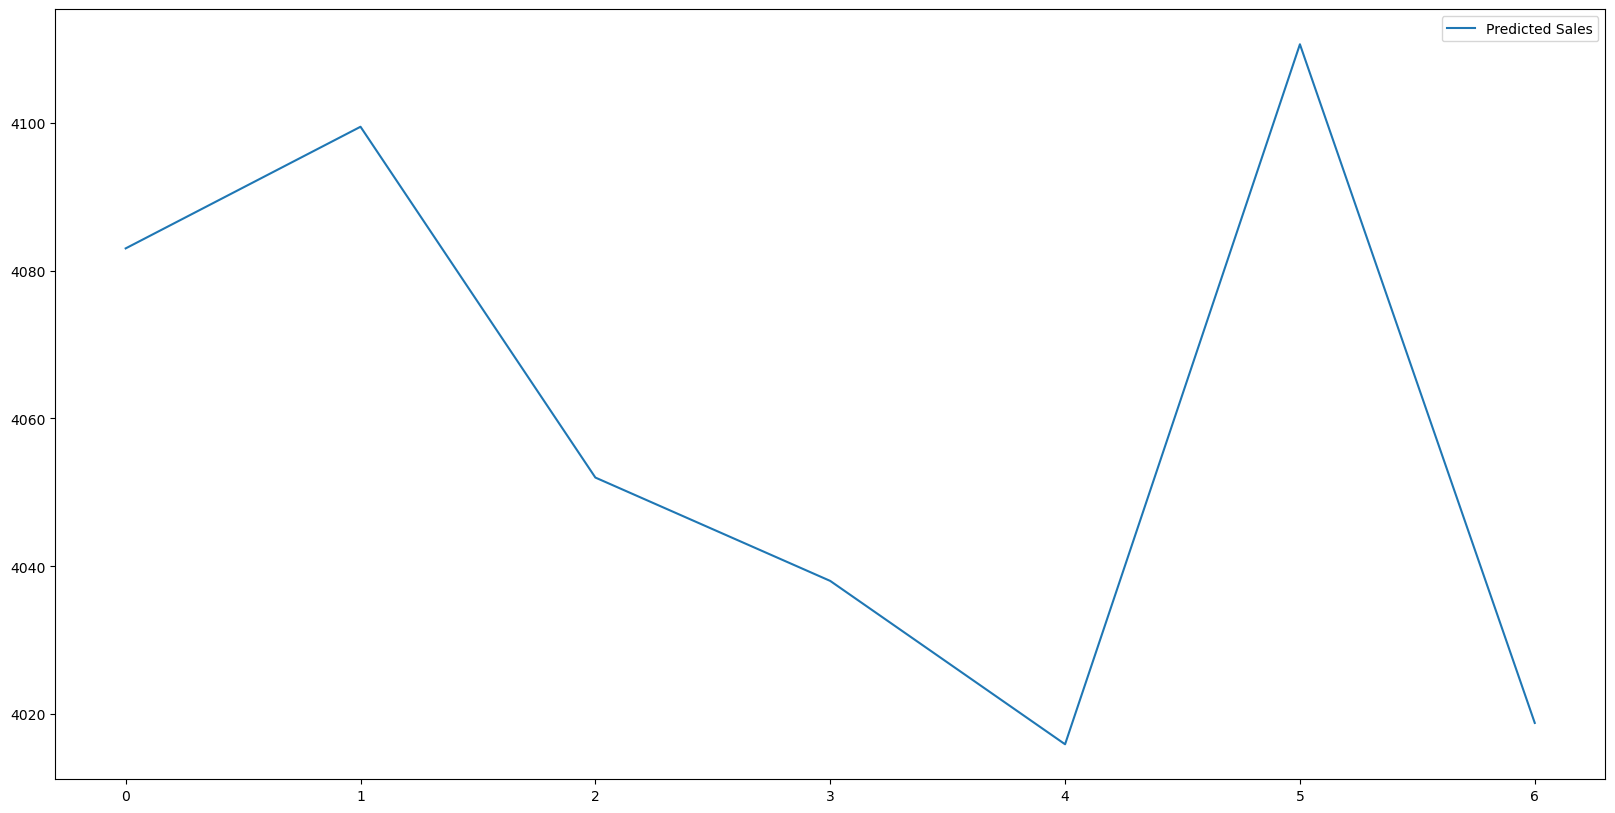

In [68]:
df = pd.read_csv('./prediction.csv')
df.plot()